In [10]:
from graphviz import Digraph
from collections import namedtuple

In [11]:
Machine = namedtuple('Machine', ['lights', 'buttons', 'joltage'])

def parse(line):
    [lights, *buttons, joltage] = line.split()
    lights = [1 if c == '#' else 0 for c in lights.strip("[]")]
    buttons = [set(int(c) for c in s.strip("()").split(',')) for s in buttons]
    joltage = set(int(c) for c in joltage.strip("{}").split(','))
    return Machine(lights, buttons, joltage)

In [20]:
with open("examples/10") as f:
    machines = list(map(parse, f))

m = machines[0]
m

Machine(lights=[0, 1, 1, 0], buttons=[{3}, {1, 3}, {2}, {2, 3}, {0, 2}, {0, 1}], joltage={3, 4, 5, 7})

In [31]:
Graph = namedtuple('Graph', ['nodes', 'edges', 'start', 'dest'])

def graph(machine):
    nodes = set()
    edges = set()
    start = tuple([0]*len(machine.lights))
    dest = tuple(machine.lights)
    nodes.add(start)
    def apply(node, button):
        new = list(node)
        for pos in button:
            new[pos] = 1 if new[pos] == 0 else 0
        return tuple(new)
    for button in machine.buttons:
        next = [(node, apply(node, button)) for node in nodes]
        for (old, new) in next:
            nodes.add(new)
            edges.add((old, new, str(button)))
    return Graph(nodes, edges, start, dest)

In [34]:
def draw_dot(graph):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR', 'size': '12,12'})
    dot.attr('node', color='#666')
    dot.attr('edge', color='#666', fontcolor='#666')
    for node in graph.nodes:
        dot.node(node_label(node))
    for (u, v, edge_label) in graph.edges:
        dot.edge(node_label(u), node_label(v), label=edge_label)
    dot.node(node_label(graph.start), style='filled', fillcolor='beige')
    dot.node(node_label(graph.dest), color='black', style='filled', fillcolor='beige')
    return dot

def node_label(node):
    return ''.join(map(str, node))

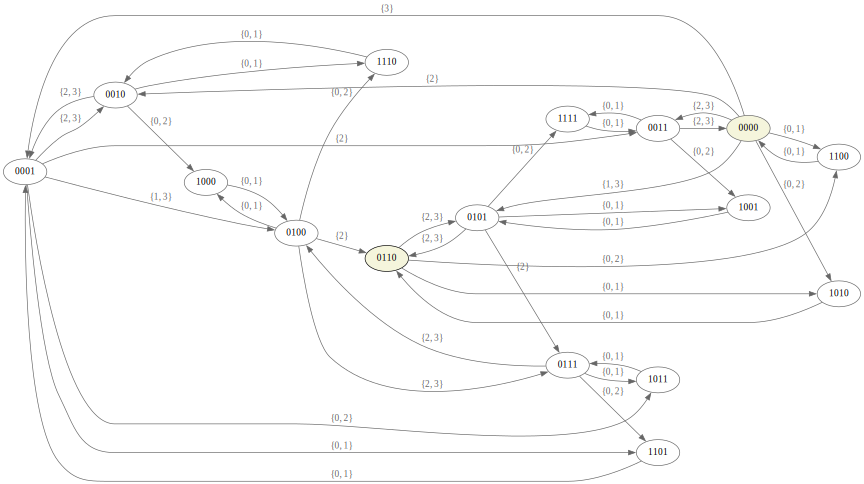

In [35]:
draw_dot(graph(m))

In [37]:
def shortest_path(graph):
    nodes, edges, start, dest = graph
    inf = 10000
    
    queue = set()
    dist = {}
    for v in nodes:
        dist[v] = inf
        queue.add(v)
    dist[start] = 0

    # vertex in Q with minimum dist[u]
    def min_d():
        d = inf
        u = None
        for v in queue:
            if dist[v] < d:
                (d, u) = (dist[v], v)
        queue.remove(u)
        return u
    
    while len(queue):
        u = min_d()
        neighbours = [e[1] for e in edges if e[0] == u and e[1] in queue]
        for v in neighbours:
            alt = dist[u] + 1
            if dist[v] > alt:
                dist[v] = alt
                    
    return dist[dest]

shortest_path(graph(m))

2

In [38]:
list([shortest_path(graph(m)) for m in machines])

[2, 3, 2]